In [1]:
import pandas as pd
import numpy as np

chips_df = pd.read_csv("data/chips.csv")
chips_df["class"] = chips_df["class"].apply(lambda x: +1.0 if x == "P" else 0.0)

geyser_df = pd.read_csv("data/geyser.csv")
geyser_df["class"] = geyser_df["class"].apply(lambda x: +1.0 if x == "P" else 0.0)
geyser_df["x"] = geyser_df["x"].apply(float)

_geyser = geyser_df.to_numpy()
_chips = chips_df.to_numpy()

rng = np.random.default_rng(0)
rng.shuffle(_geyser)
rng.shuffle(_chips)

X_geyser = _geyser[:, :2]
Y_geyser = _geyser[:, 2]
X_chips = _chips[:, :2]
Y_chips = _chips[:, 2]

In [2]:
def train_test_split(X, Y, test_ratio=0.1):
    # to_i = int(len(X) * test_ratio)

    # X_test = X[:to_i]
    # Y_test = Y[:to_i]

    # X_train = X[to_i:]
    # Y_train = Y[to_i:]
    
    # return X_train, Y_train, X_test, Y_test
    return X.copy(), Y.copy(), X.copy(), Y.copy()

import cfml.fscore
def f_score(X_test, Y_test, model, classes=2):
    cm = np.zeros((classes, classes))
    for i in range(len(X_test)):
        y_real = Y_test[i]
        y_pred = model(X_test[i])
        cm[int(y_real)][int(y_pred)] += 1
    return cfml.fscore.avg_f_score(cm)

In [3]:
X_chips_train, Y_chips_train, X_chips_test, Y_chips_test = train_test_split(X_chips, Y_chips)
X_geyser_train, Y_geyser_train, X_geyser_test, Y_geyser_test = train_test_split(X_geyser, Y_geyser)

In [4]:
import cfml.dt

In [5]:
chips_classifier = cfml.dt.RandomForest(
    X_chips_train,
    Y_chips_train,
    100,
    seed=0
)
chips_classifier.grow()

In [6]:
f_score(X_chips_test, Y_chips_test, chips_classifier)

0.82992149093844

In [7]:
gayser_classifier = cfml.dt.RandomForest(
    X_geyser_train,
    Y_geyser_train,
    100,
    seed=0
)
gayser_classifier.grow()

In [8]:
f_score(X_geyser_test, Y_geyser_test, gayser_classifier)

0.9123916369199389

In [9]:
import matplotlib.pyplot as plt

def demo(X, Y, model):
    Y_pred = np.zeros(Y.shape[0])
    for i in range(Y.shape[0]):
        Y_pred[i] = model(X[i])
    
    x0_min, x1_min = np.amin(X, 0)
    x0_max, x1_max = np.amax(X, 0)
    
    xp, yp = np.meshgrid(np.linspace(x0_min, x0_max, 50), np.linspace(x1_min, x1_max, 50))
    
    points = np.c_[xp.ravel(), yp.ravel()]
    for point in points:
        plt.scatter(point[0], point[1], s=20, color=("red" if model(point) == +1.0 else "blue"))
    
    for i in range(X.shape[0]):
        plt.scatter(X[i][0], X[i][1], s=40, color=("black" if Y[i] == +1.0 else "white"))
        
    plt.show()


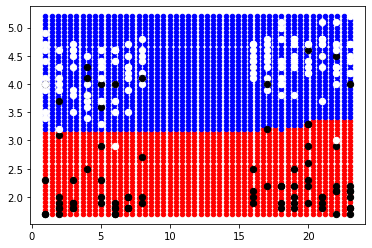

In [10]:
demo(X_geyser, Y_geyser, gayser_classifier)

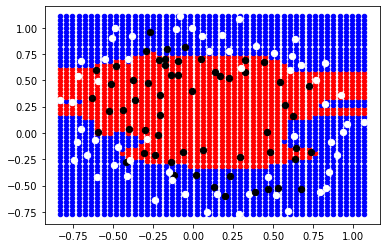

In [11]:
demo(X_chips, Y_chips, chips_classifier)

In [12]:
ada_boost_chips = cfml.dt.AdaBoostShortDecisionTree(X_chips_train, Y_chips_train, 60)
ada_boost_chips.calc()
f_score(X_chips_test, Y_chips_test, ada_boost_chips)

0.8725606962895098

In [13]:
ada_boost_geyser = cfml.dt.AdaBoostShortDecisionTree(X_geyser_train, Y_geyser_train, 60)
ada_boost_geyser.calc()
f_score(X_geyser_test, Y_geyser_test, ada_boost_geyser)

0.8990787477785115

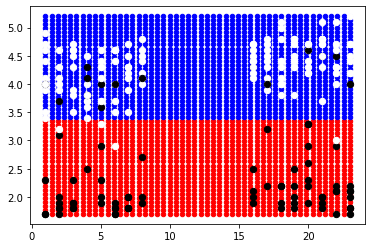

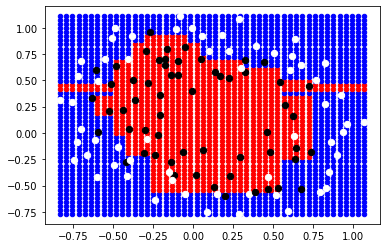

In [14]:
demo(X_geyser, Y_geyser, ada_boost_geyser)
demo(X_chips, Y_chips, ada_boost_chips)

In [15]:
def f_score_plot(X, Y, model):
    xs = list(range(1, 60))
    ys = []
    for x in xs:
        ys.append(f_score(X, Y, model.cut_steps(x)))
    
    plt.plot(xs, ys)
    plt.show()

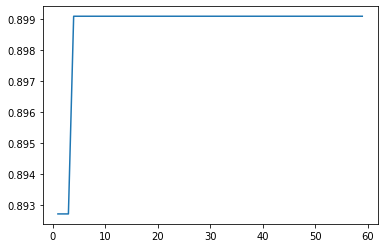

In [16]:
f_score_plot(X_geyser, Y_geyser, ada_boost_geyser)

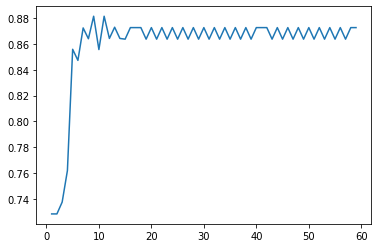

In [17]:
f_score_plot(X_chips, Y_chips, ada_boost_chips)

In [18]:
def demo_key_iters(X, Y, model):
    key_iters = (1, 2, 3, 5, 8, 13, 21, 34, 55)
    for i in key_iters:
        print("Step", i)
        demo(X, Y, model.cut_steps(i))

Step 1


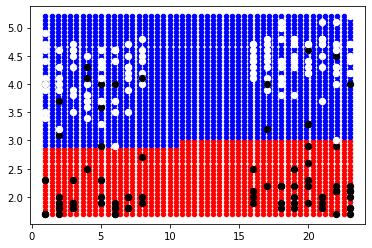

Step 2


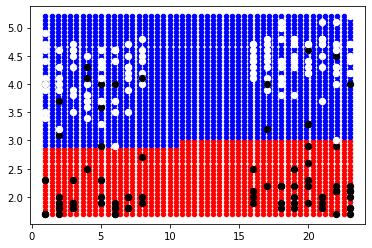

Step 3


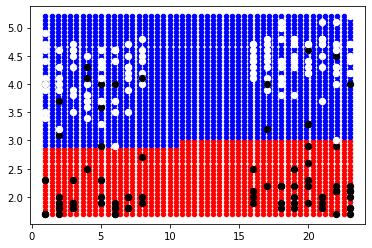

Step 5


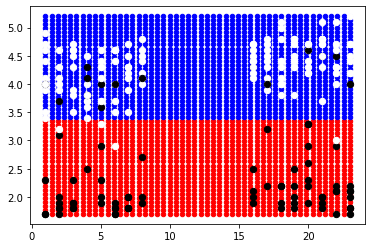

Step 8


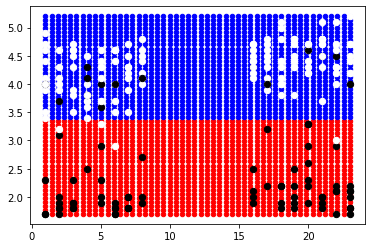

Step 13


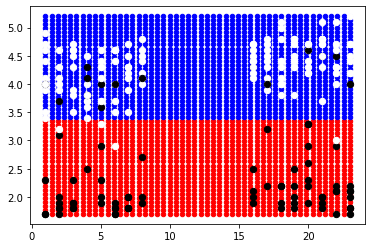

Step 21


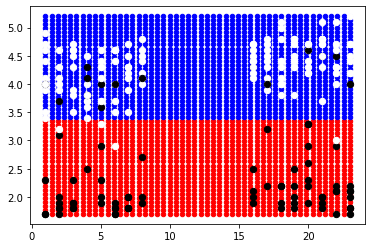

Step 34


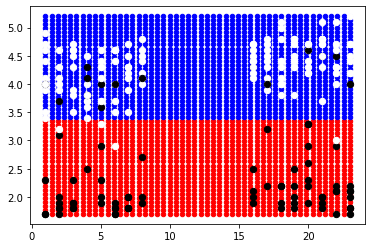

Step 55


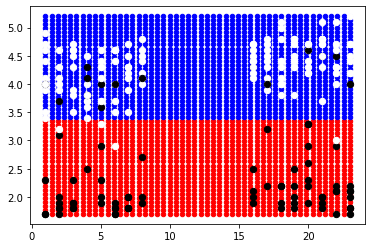

In [19]:
demo_key_iters(X_geyser, Y_geyser, ada_boost_geyser)

Step 1


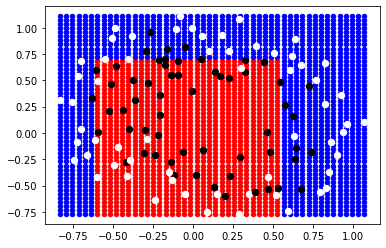

Step 2


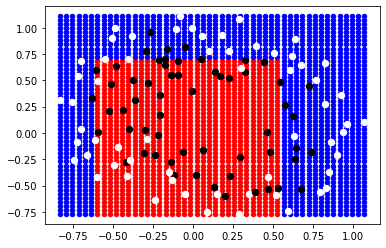

Step 3


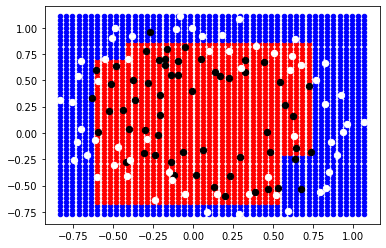

Step 5


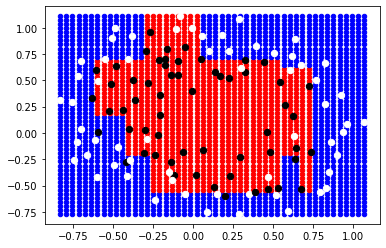

Step 8


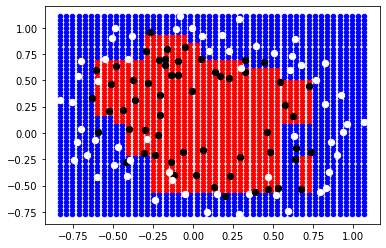

Step 13


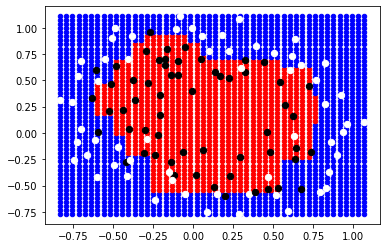

Step 21


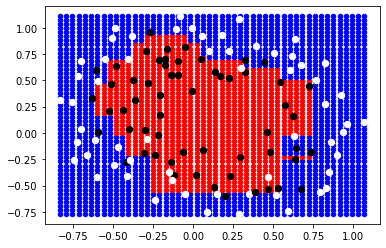

Step 34


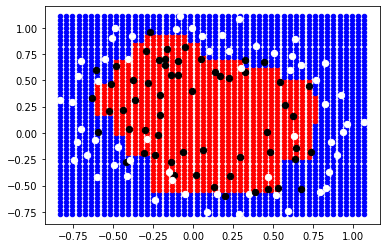

Step 55


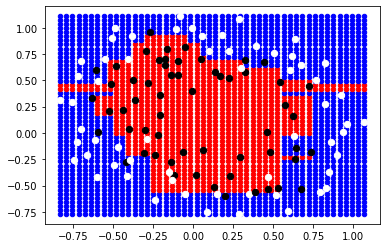

In [20]:
demo_key_iters(X_chips, Y_chips, ada_boost_chips)